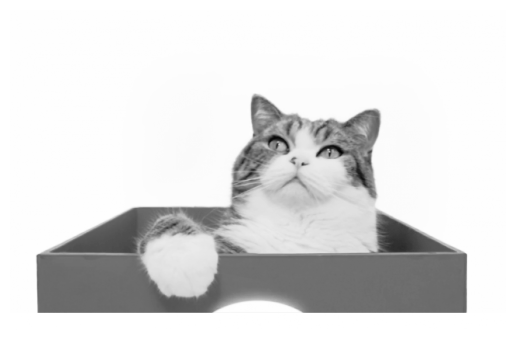

In [1]:
import urllib.request
from PIL import Image
from matplotlib import pyplot as plt
import torch
import numpy as np

def read_image(url):
    urllib.request.urlretrieve(url, "maru.png")
    img = Image.open("maru.png")
    return torch.tensor(np.array(img)/255).float()

url = "https://github.com/middlebury-csci-0451/CSCI-0451-s24/blob/main/assets/img/figs/maru.png?raw=true"

img = read_image(url)

def to_greyscale(im):
    v = torch.tensor([0.2989, 0.5870, 0.1140])
    return 1 - img[:,:,:3]@v

img = to_greyscale(img)

plt.imshow(img, cmap = "Greys")
no_ax = plt.gca().axis("off")

Implement kernel convolution for extracting features from images. Your implementation should accept a 2d array X (think of X as representing a greyscale image) and a square convolutional kernel K. Your implementation should operate using pure torch. You can use any zero-padding strategy, but you do need to explain what your strategy is when presenting.

In [20]:
import torch.nn.functional as F
import torch

def convolve2d(img, kernel):
    
    # padding is kernel row size//2
    padding = kernel.shape[0] // 2
    
    # Apply zero-padding to the input image so that we can have 3 neighbors of our edge pixels
    img_padded = torch.nn.functional.pad(img.float(), (padding, padding, padding, padding), mode='constant', value=0)
    
    # Initialize an empty tensor to store the convolution result
    conv_output = torch.zeros_like(img)
    
    # loop through the rows and cols of the image
    for i in range(padding, img_padded.shape[0] - padding):
        for j in range(padding, img_padded.shape[1] - padding):
            
            # Go through and copy the image
            region = img_padded[i - padding:i + padding + 1, j - padding:j + padding + 1]
            
            # multiply the region with the kernel and sum
            conv_output[i - padding, j - padding] = torch.sum(region * kernel)
    
    return conv_output

(-0.5, 639.5, 412.5, -0.5)

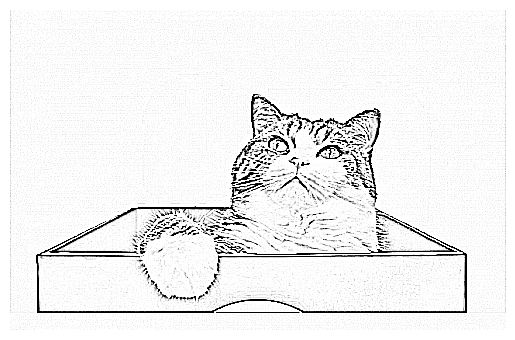

In [21]:
# from scipy.signal import convolve2d

kernel = torch.tensor([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]])

convd = convolve2d(img, kernel)

plt.imshow(convd, cmap = "Greys", vmin = 0, vmax = 0.1)
plt.gca().axis("off")